In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
sns.set()

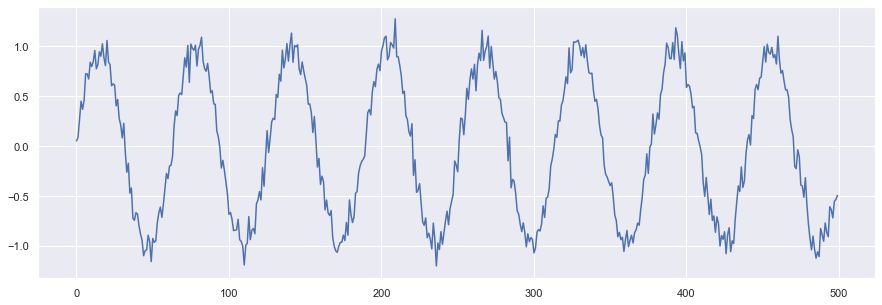

In [2]:
# make the time series data by adding noise to sine wave
size = 500
series = np.sin(0.1*np.arange(size)) + np.random.randn(size)*0.1

# visulize the series
plt.figure(figsize=(15,5))
plt.plot(series)

In [3]:
# create sequence dataset where we will look T past values to predict next value
T = 10
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [4]:
# print shape of X and Y
print("X shape {} and Y shape {}".format(X.shape,Y.shape))

X shape (490, 10) and Y shape (490,)


In [5]:
# Train & Test Split
test_size = 0.50
test_len = int(190*test_size)
boundary = X.shape[0]-test_len

# Train input and output
X_train = X[:boundary]
y_train = Y[:boundary]

# Test input and output
X_test = X[boundary:]
y_test = Y[boundary:]

In [6]:
# print Train and Test Shape
print("X Train shape {} and Y Train shape {}".format(X_train.shape,y_train.shape))
print("X Test shape {} and Y Test shape {}".format(X_test.shape,y_test.shape))

X Train shape (395, 10) and Y Train shape (395,)
X Test shape (95, 10) and Y Test shape (95,)


In [7]:
# Autoregressive model Next Output = summation of Learned Weights * Previous Output + Bias
i = Input(shape=(X_train.shape[1],))
x = Dense(1)(i)      # No activation as we just want summation of input & their corresponding learned weights + Bias
model = Model(i,x)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model compile
model.compile(optimizer='adam',loss='mse')

# train the model
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Train on 395 samples, validate on 95 samples
Epoch 1/100
395/395 [==============================] - 1s 2ms/sample - loss: 0.9689 - val_loss: 0.9393
Epoch 2/100
395/395 [==============================] - 0s 119us/sample - loss: 0.9263 - val_loss: 0.8968
Epoch 3/100
395/395 [==============================] - 0s 119us/sample - loss: 0.8857 - val_loss: 0.8594
Epoch 4/100
395/395 [==============================] - 0s 119us/sample - loss: 0.8496 - val_loss: 0.8227
Epoch 5/100
395/395 [==============================] - 0s 119us/sample - loss: 0.8131 - val_loss: 0.7877
Epoch 6/100
395/395 [==============================] - 0s 96us/sample - loss: 0.7799 - val_loss: 0.7543
Epoch 7/100
395/395 [==============================] - 0s 119us/sample - loss: 0.7469 - val_loss: 0.7238
Epoch 8/100
395/395 [==============================] - 0s 135us/sample - loss: 0.7158 - val_loss: 0.6923
Epoch 9/100
395/395 [==============================] - 0s 119us/sample - loss: 0.6855 - val_loss: 0.6634
Epoch 10/100


395/395 [==============================] - 0s 119us/sample - loss: 0.0254 - val_loss: 0.0243
Epoch 79/100
395/395 [==============================] - 0s 97us/sample - loss: 0.0249 - val_loss: 0.0238
Epoch 80/100
395/395 [==============================] - 0s 119us/sample - loss: 0.0243 - val_loss: 0.0233
Epoch 81/100
395/395 [==============================] - 0s 97us/sample - loss: 0.0237 - val_loss: 0.0228
Epoch 82/100
395/395 [==============================] - 0s 79us/sample - loss: 0.0233 - val_loss: 0.0223
Epoch 83/100
395/395 [==============================] - 0s 135us/sample - loss: 0.0228 - val_loss: 0.0220
Epoch 84/100
395/395 [==============================] - 0s 79us/sample - loss: 0.0224 - val_loss: 0.0216
Epoch 85/100
395/395 [==============================] - 0s 118us/sample - loss: 0.0220 - val_loss: 0.0213
Epoch 86/100
395/395 [==============================] - 0s 135us/sample - loss: 0.0217 - val_loss: 0.0210
Epoch 87/100
395/395 [==============================] - 0s 135u

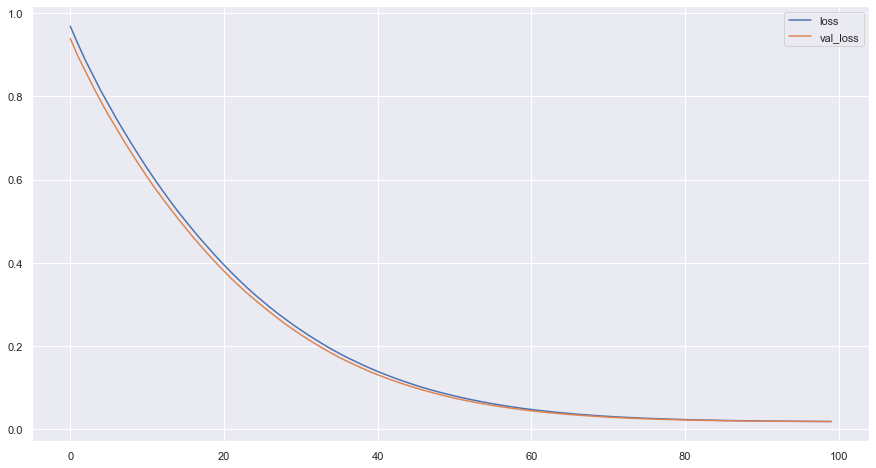

In [10]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [11]:
# Forecasting
forecast = []
last_actual = X_train[-1]  # first input sequence to the model
for t in range(X_test.shape[0]):
    predict = model.predict(last_actual.reshape(1,-1))
    predict = predict[0][0]  # get single scalar value
    
    # create next model input sequence
    last_actual = np.roll(last_actual,-1)
    last_actual[-1] = predict
    
    forecast.append(predict)

forecast = np.array(forecast)
print("Actual Y Test shape {} and Predicted Y Test shape {}".format(y_test.shape,forecast.shape))

Actual Y Test shape (95,) and Predicted Y Test shape (95,)


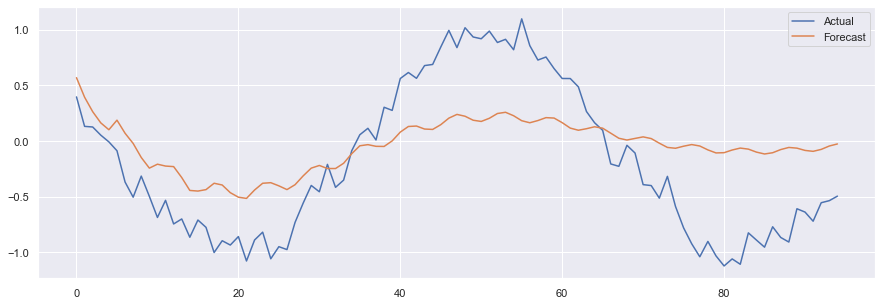

In [12]:
# plot actual vs Forecast
plt.figure(figsize=(15,5))
plt.plot(y_test,label='Actual')
plt.plot(forecast,label='Forecast')
plt.legend()